In [2]:
import pandas as pd
import regex as re
import numpy as np
book = pd.read_csv("BX-Books.csv")
rating = pd.read_csv("BX-Ratings.csv")
user = pd.read_csv("BX-Users.csv")

In [3]:
book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
1,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
2,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group
3,0440234743,The Testament,John Grisham,1999,Dell
4,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume
...,...,...,...,...,...
18180,0375411615,"Love, Etc.",Julian Barnes,2001,Alfred A. Knopf
18181,0836227751,The Wit And Whimsy Of Mary Engelbreit,Mary Engelbreit,1997,Andrews McMeel Publishing
18182,8433966634,Los Detectives Salvajes,Roberto Bolano,2003,Anagrama
18183,0330353349,The Ice House (TV Tie-In Edition),Minette Walters,1997,McClelland & Stewart


In [4]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48299 entries, 0 to 48298
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User-ID       48299 non-null  int64 
 1   User-City     48238 non-null  object
 2   User-State    48299 non-null  object
 3   User-Country  47630 non-null  object
 4   User-Age      29347 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [5]:
# remove trailing double quote
user["User-Age"] = user.apply(
    lambda row: re.sub(r'\"$', "", row["User-Age"]) if not pd.isna(row["User-Age"]) else row["User-Age"],
    axis=1
)
# impute user age
user["User-Age"].fillna(user["User-Age"].median(), inplace=True)
user.astype({
    "User-Age": "int32",
})
user["User-Age"] = user["User-Age"].astype(int)

In [6]:
# remove trailing double quote
user["User-Country"] = (user['User-Country']
                         .apply(lambda country: re.sub(r'\"$', "", country) if not pd.isna (country) else country))


In [7]:
!pip install pycountry
import pycountry as pc
import pprint
matchCountryMap = {}
naCountries = {}
countries = pd.Series(user["User-Country"].unique())
naCount = 0
possibleNANames = ["n/a", "na"]
notFoundCountries = []
for country in countries:
    if not pd.isna(country):
        if not country.lower() in possibleNANames:
            countryName = str(country)
            countryName = countryName.title()
            try:
                if "." in countryName:
                    countryName = countryName.replace(".","").upper()
                matchCountryMap[country] = pc.countries.lookup(countryName)
            except LookupError as e:
                naCount += 1
                try:
                    matchCountryMap[country] = pc.countries.search_fuzzy(countryName)[0]
                except LookupError as _:
                    notFoundCountries.append(countryName)
                    print("Not found ", countryName)
        else:
            matchCountryMap[country] = pd.NA

manualMatchCountryMap = {
    'Alderney': pc.countries.lookup("guernsey"),
    'Turkey': pc.countries.lookup("TUR"),
    'US OF A': pc.countries.lookup("USA"),
    'Tdzimi': pd.NA,
    'España': pc.countries.lookup("ESP"),
    'Lkjlj': pd.NA,
    'N/A - On The Road': pd.NA,
    'Yugoslavia': pd.NA,
    'Richmond Country': pd.NA,
    'Framingham' : pc.countries.lookup("USA"),
    'United Kindgonm': pc.countries.lookup("GB"),
    'Universe': pd.NA,
    'ST HELENA': pc.countries.lookup("SH"),
    'Aroostook': pc.countries.lookup("US"),
    'Burma': pc.countries.lookup("MM"),
    'Van Wert': pc.countries.lookup("USA"),
    'Far Away': pd.NA,
    'K1C7B1': pd.NA,
    'Rutherford': pd.NA,
    'UAE': pc.countries.lookup("ARE"),
    'Petrolwar Nation': pd.NA,
    'Shelby': pd.NA,
    'Catalonia': pc.countries.lookup("ESP"),
    'Caribbean Sea': pd.NA,
    'Cananda': pc.countries.lookup("CA"),
    'Pender': pd.NA,
    'La France': pc.countries.lookup("FR"),
    'Phillipines': pc.countries.lookup("PHL"),
    'Los Estados Unidos De Norte America': pc.countries.lookup("USA"),
    'Orange Co': pc.countries.lookup("USA"),
    'Unknown': pd.NA,
    'L`Italia': pc.countries.lookup("IT"),
    'Kern': pd.NA,
    'STTHOMASI': pd.NA,
    'Everywhere And Anywhere': pd.NA,
    'United Staes': pc.countries.lookup("USA"),
    'Deutschland': pc.countries.lookup("DE"),
}


Not found   Alderney
SubdivisionHierarchy(code='MX-MEX', country_code='MX', name='México', parent_code=None, type='State')
SubdivisionHierarchy(code='GT-GU', country_code='GT', name='Guatemala', parent_code=None, type='Department')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
Not found   N/A
Not found   Turkey
Not found   US OF A
Not found   Tdzimi
SubdivisionHierarchy(code='BE-WLX', country_code='BE', name='Luxembourg', parent='WAL', parent_code='BE-WAL', type='Province')
SubdivisionHierarchy(code='LU-LU', country_code='LU', name='Luxembourg', parent_code=None, type='Canton')
Not found   España
SubdivisionHierarchy(code='BD-13', country_code='BD', name='Dhaka', parent='C', parent_code='BD-C', type='District')
SubdivisionHierarchy(code='BD-15', country_code='BD', name='Faridpur', parent='C', parent_code='BD-C', type='District')
SubdivisionHierarchy(code='BD-17', country_code='BD', name='Gopalganj', parent='C', parent_code='BD-

In [8]:
def matchCountry(name):
    if not pd.isna(name):
        country = 0
        if name in matchCountryMap:
            country = matchCountryMap.get(name)
        else:
            country = manualMatchCountryMap.get(name)
        if country is pd.NA or country is None: return "others"
        return country.name
    return "others"
# 
user["User-Country"] = user["User-Country"].apply(
    lambda name: matchCountry(name)
)
user["User-Country"]

0               Canada
1        United States
2        United States
3        United States
4               others
             ...      
48294           Canada
48295           Canada
48296    United States
48297        Australia
48298    United States
Name: User-Country, Length: 48299, dtype: object

In [9]:
user.drop(["User-City", "User-State"], axis = 1, inplace=True)

In [10]:
# Remove Age outlier
outliers = user[(user["User-Age"] < 5) | (user["User-Age"] >= 100)]
user.drop(outliers.index, inplace=True)

In [11]:
user

,User-ID,User-Country,User-Age
0,8,Canada,34
1,9,United States,34
2,16,United States,34
3,17,United States,34
4,19,others,14
...,...,...,...
48294,278846,Canada,23
48295,278849,Canada,23
48296,278851,United States,33
48297,278852,Australia,32


In [12]:
user.describe()

,User-ID,User-Age
count,48115.000000,48115.000000
mean,139551.696893,35.310423
std,80430.008962,10.676056
min,8.000000,5.000000
25%,69164.000000,31.000000
50%,138849.000000,34.000000
75%,209416.500000,37.000000
max,278854.000000,99.000000


In [13]:
user.to_csv("user.csv")

In [14]:
user["User-Country"].value_counts()

User-Country
United States     34358
Canada             4595
Germany            1852
United Kingdom     1778
Australia           974
                  ...  
Guatemala             1
Cuba                  1
Albania               1
Bahrain               1
Ghana                 1
Name: count, Length: 125, dtype: int64

In [15]:
rating

,User-ID,ISBN,Book-Rating
0,276744,038550120X,7
1,276754,0684867621,8
2,276755,0451166892,5
3,276762,0380711524,5
4,276772,0553572369,7
...,...,...,...
204159,276688,0892966548,10
204160,276688,1551669315,6
204161,276704,0345386108,6
204162,276704,0743211383,7


In [16]:
# average book rating can resolve new user issue
average_ratings = rating.groupby('ISBN')['Book-Rating'].mean().reset_index()
# Merge average_ratings with book_df
book = pd.merge(book, round(average_ratings), on='ISBN', how='left')

In [17]:
# Return top popular and highest rating books to new user
def topBook(numBook):
    rating_counts = rating["ISBN"].value_counts().rename("Rating-Count")
    book_updated = pd.merge(book, rating_counts, left_on="ISBN", right_index=True, how="left")
    book_updated.sort_values(by=["Rating-Count"], ascending=False, inplace=True)
    topPopular = book_updated.head(numBook)
    return topPopular

In [18]:
topBook(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Book-Rating,Rating-Count
223,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",8.0,675
7,0971880107,Wild Animus,Rich Shapero,2004,Too Far,4.0,575
401,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,8.0,479
276,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,8.0,362
589,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,8.0,312
1136,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books,9.0,308
198,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,8.0,302
381,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books,8.0,281
172,044023722X,A Painted House,John Grisham,2001,Dell Publishing Company,7.0,274
127,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books,8.0,268


In [19]:
def discretize_age_group(age):
    if age <= 16:
        return "Child"
    elif 17 <= age <= 30:  
        return "Young Adult"
    elif 31 <= age <= 45:  
        return "Middle-Aged Adult"
    else:
        return "Old-aged Adult"

In [20]:
user["User-Age"] = user["User-Age"].apply(lambda age : discretize_age_group(age))

In [21]:
age_group_counts = user["User-Age"].value_counts()

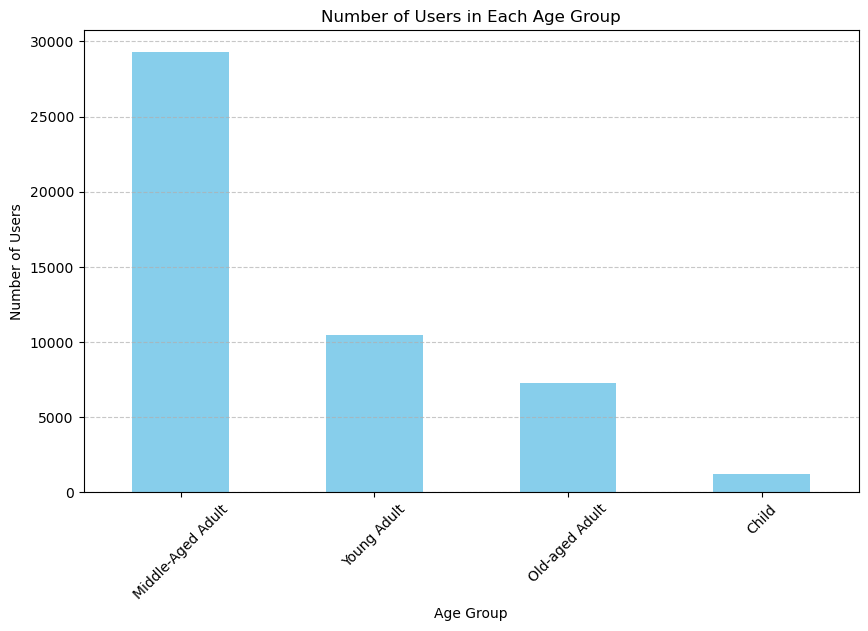

In [22]:
import matplotlib.pyplot as plt

# number of users from each age group
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.title('Number of Users in Each Age Group')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()

Text(0.5, 1.0, 'User Countries (Excluding Smaller Countries)')

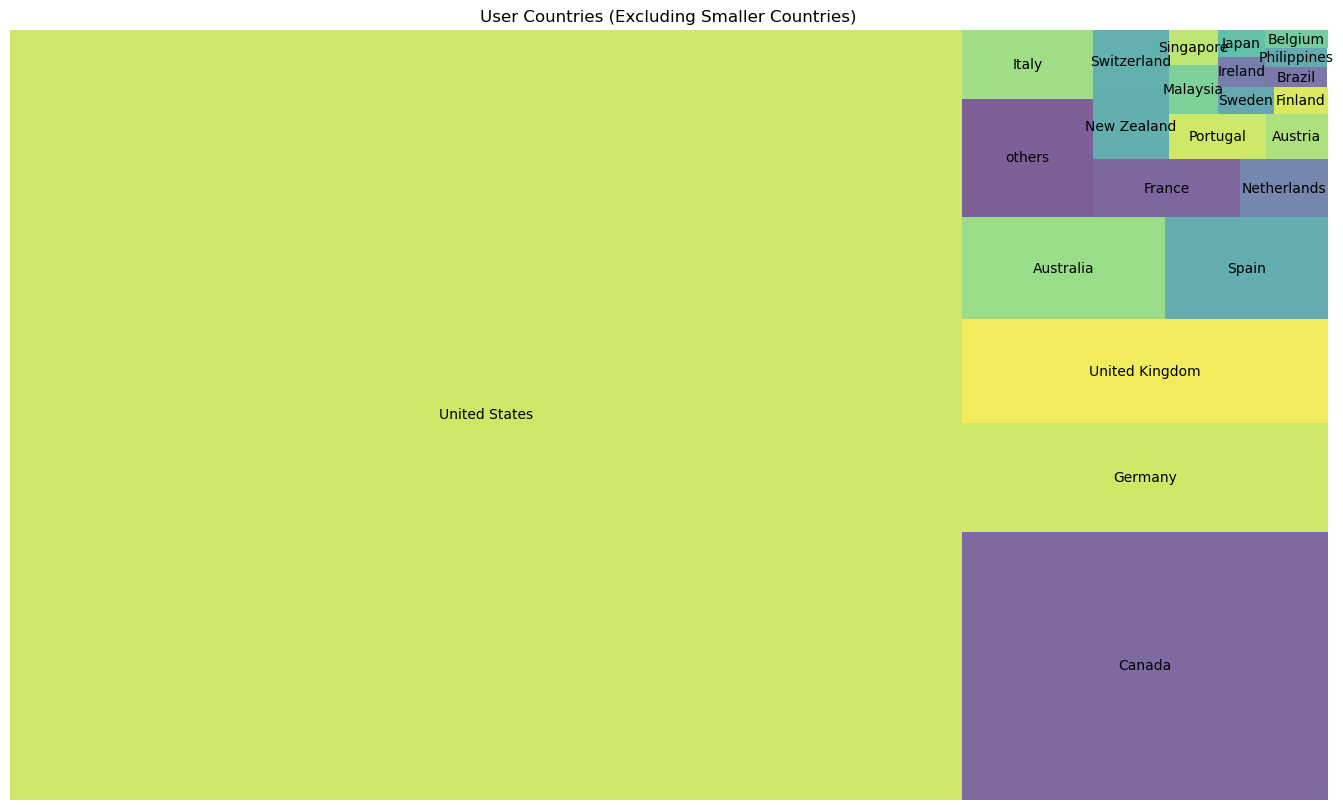

In [23]:
#pip install squarify
import squarify
country_counts = user['User-Country'].value_counts()
large_countries = country_counts[country_counts >= 50]

# Create a squarify treemap
plt.figure(figsize=(17, 10))
squarify.plot(sizes=large_countries, label=large_countries.index, alpha=0.7)
plt.axis('off')
plt.title('User Countries (Excluding Smaller Countries)')

In [24]:
book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Book-Rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0
1,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8.0
2,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,8.0
3,0440234743,The Testament,John Grisham,1999,Dell,8.0
4,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,8.0
...,...,...,...,...,...,...
18180,0375411615,"Love, Etc.",Julian Barnes,2001,Alfred A. Knopf,6.0
18181,0836227751,The Wit And Whimsy Of Mary Engelbreit,Mary Engelbreit,1997,Andrews McMeel Publishing,9.0
18182,8433966634,Los Detectives Salvajes,Roberto Bolano,2003,Anagrama,8.0
18183,0330353349,The Ice House (TV Tie-In Edition),Minette Walters,1997,McClelland & Stewart,7.0


In [25]:
rating_counts = rating["ISBN"].value_counts().rename("Rating-Count")
book = pd.merge(book, rating_counts, left_on="ISBN", right_index=True, how="left")

Text(0.5, 1.0, 'Average Rating of Books for Top 10 most popular Authors')

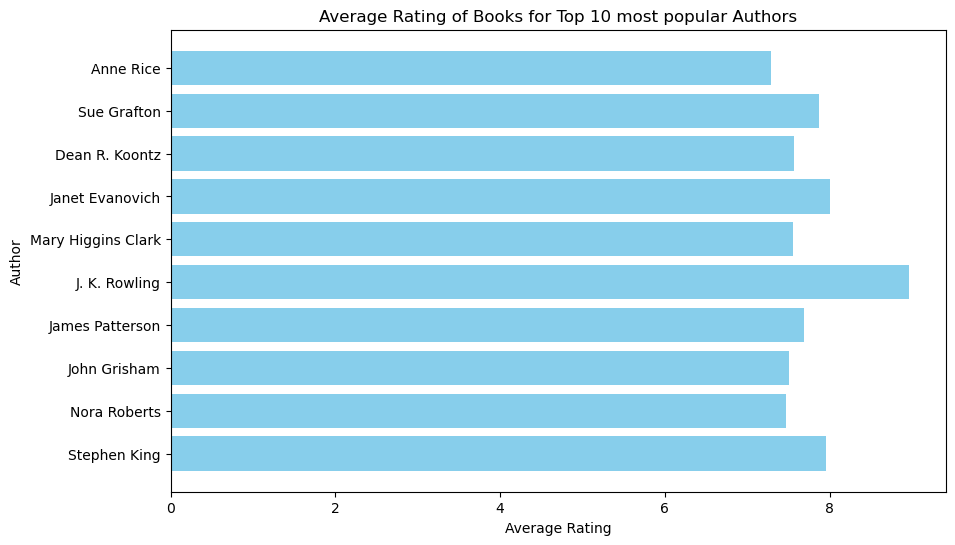

In [26]:
author_stats = book.groupby('Book-Author').agg({'Book-Rating': 'mean', 'Rating-Count': 'sum'}).reset_index()
author_stats.sort_values(by=['Rating-Count', 'Book-Rating'], ascending=[False, False], inplace=True)
top_10_authors = author_stats.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_authors["Book-Author"], top_10_authors["Book-Rating"], color='skyblue')
plt.xlabel("Average Rating") 
plt.ylabel("Author")  
plt.title("Average Rating of Books for Top 10 most popular Authors")

Text(0.5, 1.0, 'Rating count of Books for Top 10 Authors')

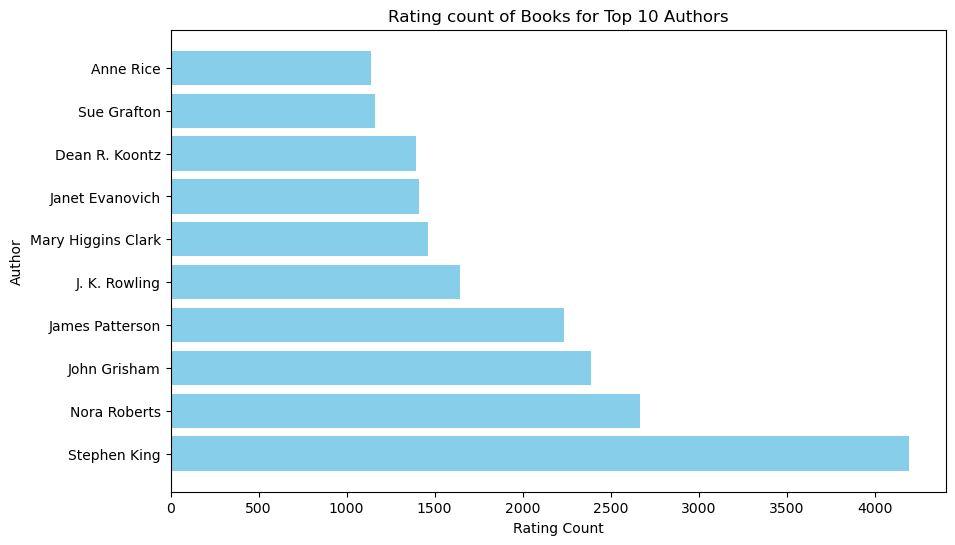

In [27]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_authors["Book-Author"], top_10_authors["Rating-Count"], color='skyblue')
plt.xlabel("Rating Count") 
plt.ylabel("Author")  
plt.title("Rating count of Books for Top 10 Authors")

Text(0.5, 1.0, 'Count of Each Book Rating')

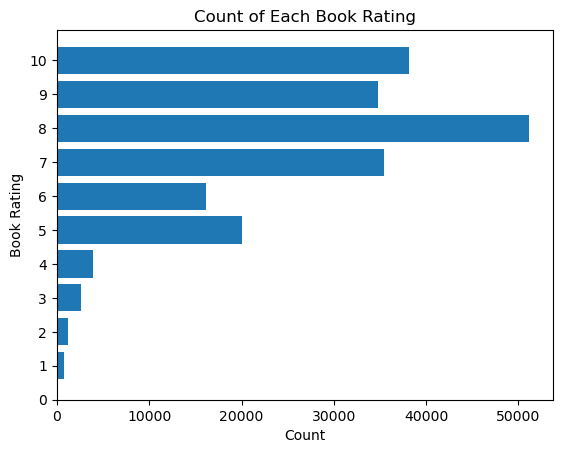

In [28]:
import matplotlib.pyplot as plt
rating_counts = rating["Book-Rating"].value_counts()
rating_counts = rating_counts.sort_index()
plt.barh(rating_counts.index, rating_counts)

plt.yticks(range(0,11))
plt.xlabel('Count')
plt.ylabel('Book Rating')
plt.title('Count of Each Book Rating')

In [29]:
rating

,User-ID,ISBN,Book-Rating
0,276744,038550120X,7
1,276754,0684867621,8
2,276755,0451166892,5
3,276762,0380711524,5
4,276772,0553572369,7
...,...,...,...
204159,276688,0892966548,10
204160,276688,1551669315,6
204161,276704,0345386108,6
204162,276704,0743211383,7


In [30]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # casefolding
    text = str(text).lower()
    # remove all non-alphabetic character
    letters_only = re.sub(r'[^a-zA-Z]', ' ', text)
    # tokenization
    tokens = word_tokenize(letters_only)
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    text = ' '.join(tokens)
    return text

# Assuming "books" is a DataFrame and "Book-Title" is one of its columns
book["Book-Title"] = book["Book-Title"].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ducbui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ducbui/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ducbui/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
book["Book-Author"] = book["Book-Author"].apply(preprocess_text)

In [32]:
def filter_ratings_by_user(users_df, ratings_df):
    user_ids = users_df["User-ID"]
    filtered_ratings_df = ratings_df[ratings_df['User-ID'].isin(user_ids)]
    return filtered_ratings_df
rating = filter_ratings_by_user(user, rating)

In [33]:
rating

,User-ID,ISBN,Book-Rating
0,276744,038550120X,7
1,276754,0684867621,8
2,276755,0451166892,5
3,276762,0380711524,5
4,276772,0553572369,7
...,...,...,...
204159,276688,0892966548,10
204160,276688,1551669315,6
204161,276704,0345386108,6
204162,276704,0743211383,7


In [34]:
isbn_to_index = {isbn: idx for idx, isbn in enumerate(rating['ISBN'].unique())}
userId_to_index = {userId: idx for idx, userId in enumerate(rating['User-ID'].unique())}
rating['book_id'] = rating['ISBN'].map(isbn_to_index)
rating['user_id'] = rating['User-ID'].map(userId_to_index)

/var/folders/hd/w17hkvkj0qvg0bg97xgk48440000gn/T/ipykernel_1958/4136405847.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating['book_id'] = rating['ISBN'].map(isbn_to_index)
/var/folders/hd/w17hkvkj0qvg0bg97xgk48440000gn/T/ipykernel_1958/4136405847.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating['user_id'] = rating['User-ID'].map(userId_to_index)


In [35]:
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

In [36]:
rating_df = rating[["book_id", "user_id", "Book-Rating"]]
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(rating_df, reader)

algo = SVD() 
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)
accuracy.mae(predictions)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.6091  1.6126  1.6206  1.6136  1.6109  1.6134  0.0039  
MAE (testset)     1.2428  1.2469  1.2521  1.2477  1.2445  1.2468  0.0032  
Fit time          1.56    1.44    1.47    1.46    1.45    1.48    0.04    
Test time         0.09    0.09    0.09    0.21    0.09    0.11    0.05    
RMSE: 1.6195
MAE:  1.2510


1.2510327339386207

In [37]:
isbn_to_title = dict(zip(book['ISBN'], book['Book-Title']))
rating['Book-Title'] = rating['ISBN'].map(isbn_to_title)

/var/folders/hd/w17hkvkj0qvg0bg97xgk48440000gn/T/ipykernel_1958/110848175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating['Book-Title'] = rating['ISBN'].map(isbn_to_title)


In [38]:
def recommend_book(user_id, k=10):
    recommendations = []
    all_books = rating['book_id'].unique()
    for book_id in all_books:
        if rating[(rating['user_id'] == user_id) & (rating['book_id'] == book_id)].empty:
            prediction = algo.predict(user_id, book_id)
            recommendations.append((book_id, prediction.est))
    recommendations.sort(key=lambda x: x[1], reverse=True)
    top_k_recommendations = recommendations[:k]
    
    titles = []
    scores = []
    for book_info in top_k_recommendations:
        book_id = book_info[0]
        score = book_info[1]
        title = rating.loc[rating["book_id"] == book_id]["Book-Title"].iloc[0]
        titles.append(title)
        scores.append(score)
    
    df = pd.DataFrame({'Title': titles, 'Score': scores})
    return df


In [39]:
recommend_book(user_id=5, k=5)

,Title,Score
0,ageless body timeless mind quantum alternative...,9.690136
1,riddley walker,9.422075
2,day jackal,9.316718
3,lie lying liar tell fair balanced look right,9.285562
4,year scrapbooking,9.284283


In [44]:
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import SVD
from surprise import NMF
import pandas as pd
benchmark = []
rating_df = rating[["book_id", "user_id", "Book-Rating"]]
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(rating_df, reader)
# Iterate over all algorithms
for algorithm in [SVD(), KNNWithMeans(), KNNWithZScore()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=5, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = pd.concat([tmp,pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm'])])
    benchmark.append(tmp)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [45]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

In [46]:
surprise_results

,test_rmse,fit_time,test_time
Algorithm,,,
SVD,1.614824,1.524565,0.148417
KNNWithMeans,1.793601,3.688140,1.224904
KNNWithZScore,1.798497,3.876005,1.194654


In [ ]:
new_rating = pd.read_csv("BX-NewBooksRatings.csv")
new_user = pd.read_csv("BX-NewBooksUsers.csv")
new_book = pd.read_csv("BX-NewBooks.csv")

In [ ]:
new_rating

In [ ]:
isbn_to_index = {isbn: idx for idx, isbn in enumerate(new_rating['ISBN'].unique())}
userId_to_index = {userId: idx for idx, userId in enumerate(new_rating['User-ID'].unique())}
new_rating['book_id'] = new_rating['ISBN'].map(isbn_to_index)
new_rating['user_id'] = new_rating['User-ID'].map(userId_to_index)